In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [11]:
data=pd.read_csv("../data/preprocessed_data.csv")

In [12]:
data

,Airline,Source,Destination,Duration,stops,class,depature time,arrival time,Price,Date,Season
0,Iberia,ROM,CMN,580,1,business,Morning,Night,4135.95,2024-03-17,Spring
1,Transavia,ROM,CMN,590,1,economy,Early Morning,Afternoon,2443.35,2024-06-01,Summer
2,Lufthansa,ROM,CMN,570,2,economy,Afternoon,Late Night,2156.70,2024-09-03,Autumn
3,Egypt Air,IST,ROM,640,1,business,Late Night,Afternoon,5561.01,2024-02-10,Winter
4,TAROM,IST,PAR,350,1,business,Morning,Afternoon,8097.18,2024-04-18,Spring
...,...,...,...,...,...,...,...,...,...,...,...
4363,Pegasus Airlines,IST,PAR,230,0,economy,Afternoon,Afternoon,3559.92,2024-09-03,Autumn
4364,Iberia,ROM,CMN,505,2,economy,Early Morning,Afternoon,2429.70,2024-01-12,Winter
4365,Turkish Airlines,IST,ROM,160,0,economy,Afternoon,Afternoon,3628.17,2024-08-16,Summer
4366,ITA Airways,ROM,IST,150,0,economy,Morning,Afternoon,1911.00,2024-10-19,Autumn


### data vizualization

Text(0, 0.5, 'Fréquence')

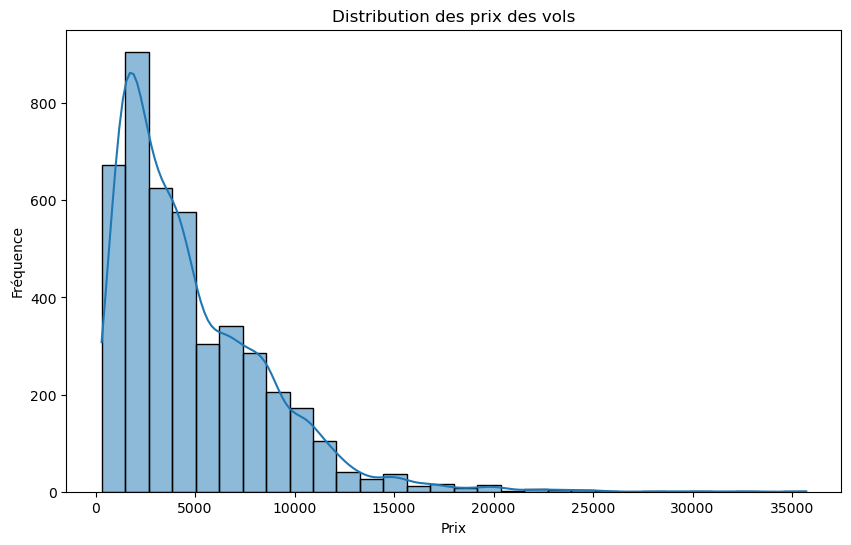

In [14]:
# Create a histogram with a KDE plot for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'],bins=30, kde=True)
plt.title('Distribution des prix des vols')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

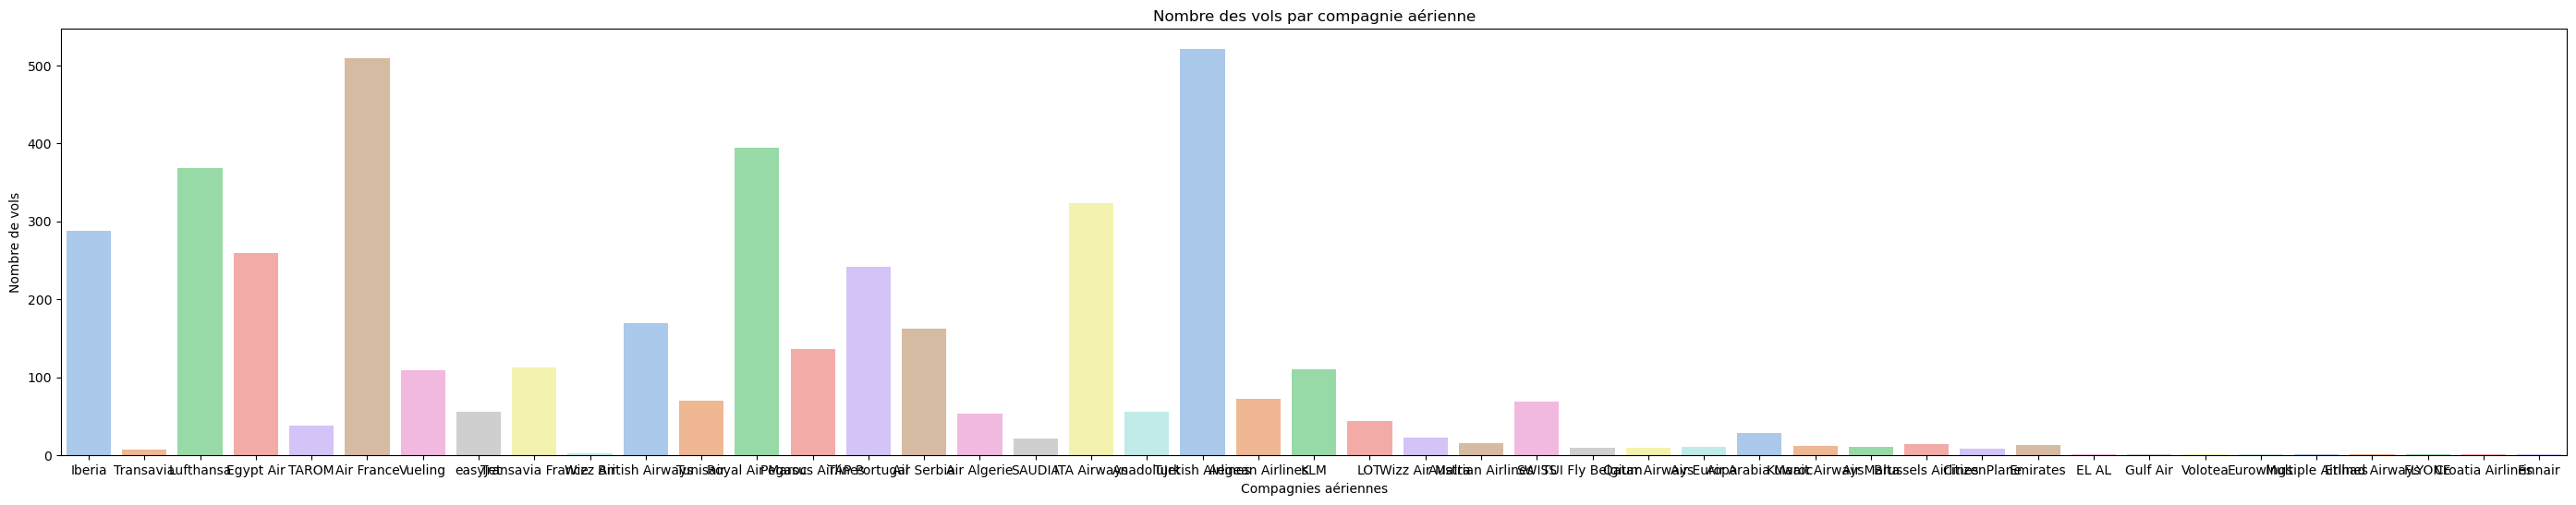

In [22]:
# Create a count plot for airline distribution
plt.figure(figsize=(35, 6))
sns.countplot(x='Airline', data=data, palette="pastel")
plt.title('Nombre des vols par compagnie aérienne')
plt.xlabel('Compagnies aériennes')
plt.ylabel('Nombre de vols')
plt.show()

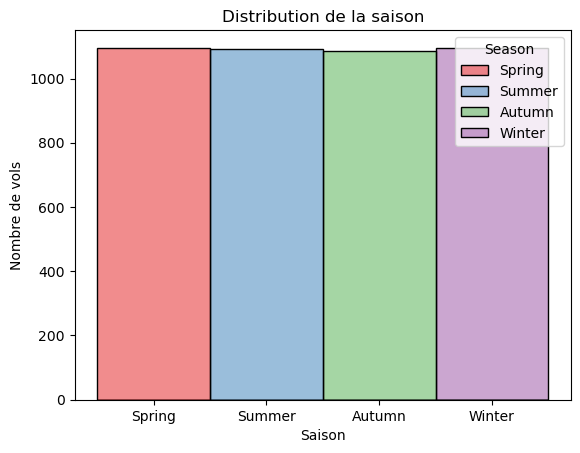

In [28]:
sns.histplot(data=data, x='Season', kde=False, bins=20, hue='Season', palette='Set1')
plt.title('Distribution de la saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de vols')
plt.show()

Text(0, 0.5, 'Prix m')

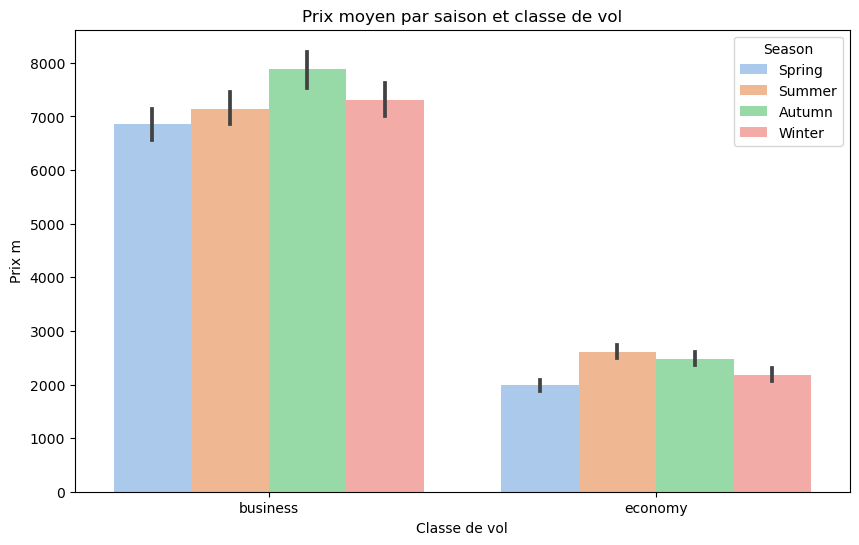

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Price', hue='Season', data=data,palette="pastel")
plt.title('Prix moyen par saison et classe de vol')
plt.xlabel('Classe de vol')
plt.ylabel('Prix m')

In [40]:
import plotly.express as px


colors = {'Spring': 'red', 'Summer': 'green', 'Autumn': 'orange', 'Winter': 'blue'}

fig = px.scatter(data, x='depature time', y='Price', color='Season',
                 size='Price', hover_data=['arrival time', 'depature time'],
                 color_discrete_map=colors,
                 title='Price vs Departure Time with Seasonal Variation')

fig.update_layout(xaxis_title='Departure Time',
                  yaxis_title='Price',
                  legend_title='Season')

fig.show()


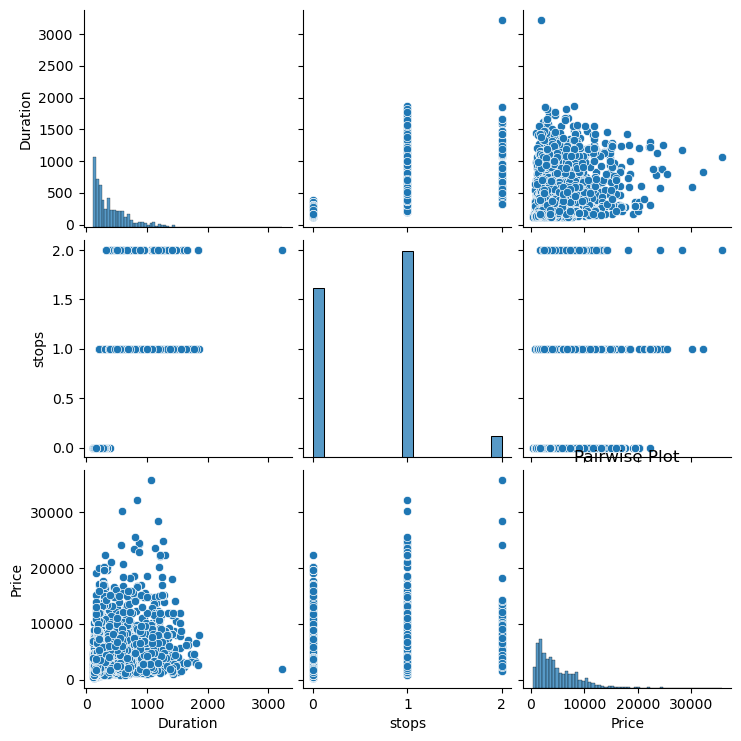

In [15]:
sns.pairplot(data)
plt.title('Pairwise Plot')
plt.show()